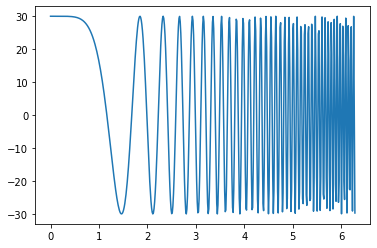

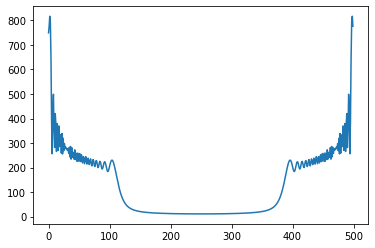

In [2]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# DFTcomplex.py:  Discrete Fourier Transform with built in complex
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

def f(signal):                                                  # Signal
    step = twopi/N;        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 30*cos(x*x*x)
        xa[i] = x                      # Plot
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              # the n frequency
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)   # finish this line, signal[k] is y[k]
      dftz[n] = zsum * sq2pi      
      nplot[n] = n
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.show()

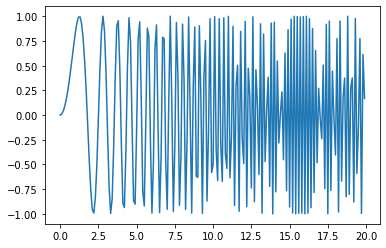

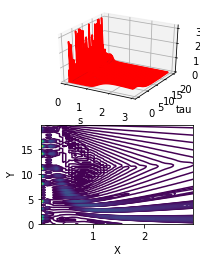

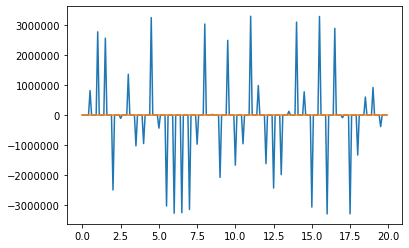

In [22]:
# Transform  sin(2*pi*t) and the signal given in the beginning (use Morlet wavelet)

import matplotlib.pyplot as plt
from numpy import *
 
ns=50
ntau=80
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=200
dtstep=20./nt
tar=arange(0.,20.,dtstep)

def func(t):
    if (t.any()>0 and t.any()<15):
        y = sin(t*t)
    else:
        y = 0
    return y

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext]) # y(t) for all t_i
    for idexs in range(ns):
        for idextau in range(ntau):
            for idext in range(nt):   # For each s and tau, integrate t for the wavelet transform
                ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1))*yarr)*dtstep
            
wavelet()
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).real, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()
p.show()  

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep


invwavelet(yarr2)
p.plot(tar,yarr2.real*2.2)
p.plot(tar,yarr)
p.show()


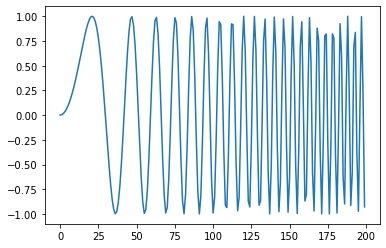

In [7]:
plt.plot(ligo(tar))